# Diabetes Prediction

In this notebook, I hope to be able to accurately predict whether or not a person has diabetes from various health diagnostic metrics. As I am only looking as to whether or not a patient has diabetes or not, this is a simple classification task. 

## Background on Diabetes
Diabetes is a medical condition which affects how the body is able to process glucose. As glucose is the main power source for our body, it is incredibility important that we are able to well regulate this sugar within out body. Typically, foods that we eat are broken down into glucose that are then uptaken by our cells. Insulin is an extremely important hormone that helps to regulate this process; it is responsible for the uptake of glucose into our cells. 

Diabetes comes about when our body is either unable to produce enough insulin or begins to no longer respond to it. When too much glucose is present in the bloodstream for too long, it can lead to other health problems, such as vision loss, nerve damage, and other serious aliments. 

There are three main types of diabetes: Type 1, Type 2, and gestational. In Type 1 diabetes, the body does not produce enough inslulin or none at all. This disease can either be due to genetics or an autoimmune response that leads to the destruction of islet cells, which produce insulin. Type 2 diabetes refers to the case in which the body does not produce enough insulin and becomes resistant to it. Gestational diabetes occurs in pregnant women who have not had diabetes before. Unlike the other 2 types of diabetes, gestational diabetes can go away once the child is delivered. However, it does increase the chance of type 2 diabetes later in life. 

## Set up & EDA

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, Normalizer

import warnings
warnings.filterwarnings('ignore')

# Load Data

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = data = pd.read_csv('/kaggle/input/diabetes-intermediate-dataset/Diabetes.csv')
df.head()

/kaggle/input/diabetes-intermediate-dataset/Diabetes.csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


This data set contains the diagnostic metrics from 768 people, where 268 of them have diabetes. The diagnostic metrics being used to classify patients into their diabetes status are: number of times pregnant, glucose concentration at 2 hours from an oral tolerance test, diastolic blood pressure, triceps skinfold thickness in milimeters, 2-hour serum insulin as measured by mu U/ml, BMI, Diabetes Pedigree Function, and age. 

In [2]:
# Print data shape
nodiabetes = df[df['Outcome']==0]
yesdiabetes = df[df['Outcome']==1]

print('Number of patients:',df.shape[0])
print('Number of patients without diabetes:',len(nodiabetes))
print('Number of patients with diabetes:',len(yesdiabetes))

Number of patients: 768
Number of patients without diabetes: 500
Number of patients with diabetes: 268


Below is a distribution of the number of times a patient was pregnant. The data was split into those with diabetes (coloured as orange and an outcome of 1) and those without (coloured as blue and an outcome of 0). Both data are right skewed. 

Additionally, both the median and mean for the number of times pregnant were printed for the entire dataset, those with diabetes, and those without diabetes. Both statistics were printed as they give an average number with and without the presence of outliers. From this, we can see there is only a difference of 1 to 2 pregnancies between those with and without diabetes. 

As mentioned before, this metric may influence the diabetes status of a patient. While the outcome in this dataset does not differenciate between the different types of diabetes, those with gestational diabetes may have been counted as part of those with diabetes. Additionally, even after birth, those who were previously diagnosed with gestinational diabetes have a higher chance later in life of being diagnosed with Type 2 diabetes. 

Average Number of Pregnancies
Total: 3.8450520833333335
Patients without diabetes: 3.298
Patients with diabetes: 4.865671641791045 

Median Number of Pregnancies
Total: 3.0
Patients without diabetes: 2.0
Patients with diabetes: 4.0


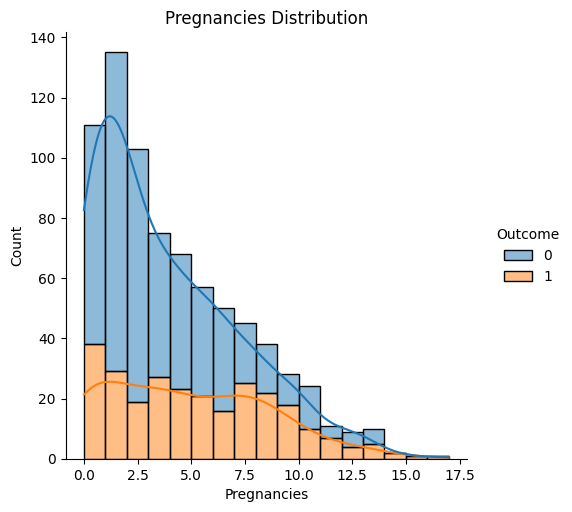

In [3]:
# Plot distribution plot & print mean and averages
sns.displot(df, x='Pregnancies', binwidth=1, kde=True, hue="Outcome", multiple="stack")
plt.xlabel('Pregnancies')
plt.title('Pregnancies Distribution')

print('Average Number of Pregnancies')
print('Total:', df['Pregnancies'].mean())
print('Patients without diabetes:', nodiabetes['Pregnancies'].mean())
print('Patients with diabetes:', yesdiabetes['Pregnancies'].mean(),'\n')

print('Median Number of Pregnancies')
print('Total:', df['Pregnancies'].median())
print('Patients without diabetes:', nodiabetes['Pregnancies'].median())
print('Patients with diabetes:', yesdiabetes['Pregnancies'].median())

Below is a distribution of the plasma glucose concentration from an oral glucose tolerance test. The data was again split into those with diabetes (coloured as orange and an outcome of 1) and those without (coloured as blue and an outcome of 0). Those without diabetes have a more normal appearing distribution while those with diabetes have a left skew distribution.

Additionally, both the median and mean for the glucose concentration were printed for the entire dataset, those with diabetes, and those without diabetes. From this, we can see there is a large difference between those with and without diabetes. 

As diabetes affects how insulin functions in the body, those with diabetes are more likely to have a higher level of glucose present in the blood; this is exemplified below in which those with diabetes have a higher level of glucose. 

Average Glucose Level
Total: 120.89453125
Patients without diabetes: 109.98
Patients with diabetes: 141.25746268656715 

Median Glucose Level
Total: 117.0
Patients without diabetes: 107.0
Patients with diabetes: 140.0


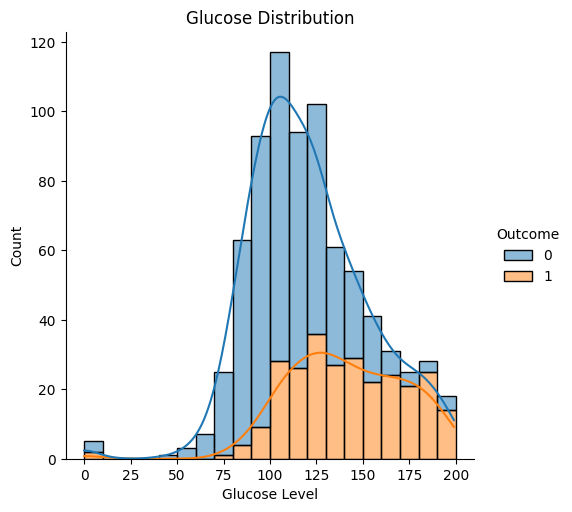

In [4]:
sns.displot(df, x='Glucose', binwidth=10, color = 'blue', kde=True, hue="Outcome", multiple="stack")
plt.xlabel('Glucose Level')
plt.title('Glucose Distribution')

print('Average Glucose Level')
print('Total:', df['Glucose'].mean())
print('Patients without diabetes:', nodiabetes['Glucose'].mean())
print('Patients with diabetes:', yesdiabetes['Glucose'].mean(),'\n')

print('Median Glucose Level')
print('Total:', df['Glucose'].median())
print('Patients without diabetes:', nodiabetes['Glucose'].median())
print('Patients with diabetes:', yesdiabetes['Glucose'].median())

Below is a distribution of diastolic blood pressure. The data was again split into those with diabetes (coloured as orange and an outcome of 1) and those without (coloured as blue and an outcome of 0). Both data have a fairly normal distribution with some outliers where those patients have a low blood pressure. 

Additionally, both the median and mean for diastolic blood pressure were printed for the entire dataset, those with diabetes, and those without diabetes. From this, we can see there is little difference between those with and without diabetes. 

While this dataset does not show a large difference between blood pressure between the datasets, high blood pressure can be a sign of diabetes. One health complication as a result of diabetes is kidney disease or failure. Diabetes may cause salt and water rention and can damage blood vessels; both can cause high blood pressure. 

Outside of the metrics presented in this dataset, we have no information on the severity of diabetes per patient, how long they have been diagnosed for, and whether or not a patient is seeking treatment. This information may allow us to better understand the difference between these metrics. 

The lack of difference in blood pressure may be attributed to patients in this dataset treating their diabetes, having a low severity, or the disease not affecting the blood pressure. 

Average Blood Pressure
Total: 69.10546875
Patients without diabetes: 68.184
Patients with diabetes: 70.82462686567165 

Median Blood Pressure
Total: 72.0
Patients without diabetes: 70.0
Patients with diabetes: 74.0


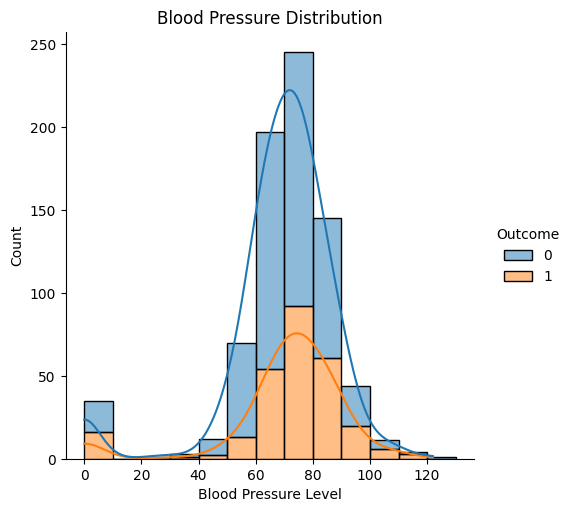

In [5]:
sns.displot(df, x='BloodPressure', binwidth=10, color = 'blue', kde=True, hue="Outcome", multiple="stack")
plt.xlabel('Blood Pressure Level')
plt.title('Blood Pressure Distribution')

print('Average Blood Pressure')
print('Total:', df['BloodPressure'].mean())
print('Patients without diabetes:', nodiabetes['BloodPressure'].mean())
print('Patients with diabetes:', yesdiabetes['BloodPressure'].mean(),'\n')

print('Median Blood Pressure')
print('Total:', df['BloodPressure'].median())
print('Patients without diabetes:', nodiabetes['BloodPressure'].median())
print('Patients with diabetes:', yesdiabetes['BloodPressure'].median())

Below is a distribution of triceps skinfold thickness. The data was again split into those with diabetes (coloured as orange and an outcome of 1) and those without (coloured as blue and an outcome of 0). Both data have a bimodal distribution, where most patients have a very small skin thickness; the rest of the data appears to be relatively normal.  

Additionally, both the median and mean for the skinfold thickness were printed for the entire dataset, those with diabetes, and those without diabetes. From this, we can see those with diabetes have a bigger skin thickness; this difference is more pronounced when we look at the median, where the influence of outliers is less stronger. 

This difference in skin thickness can be explained by the fact that high blood glucose can cause skin to harden and thicken throughout the body. 

Average Skin Thickness
Total: 20.536458333333332
Patients without diabetes: 19.664
Patients with diabetes: 22.16417910447761 

Median Skin Thickness
Total: 23.0
Patients without diabetes: 21.0
Patients with diabetes: 27.0


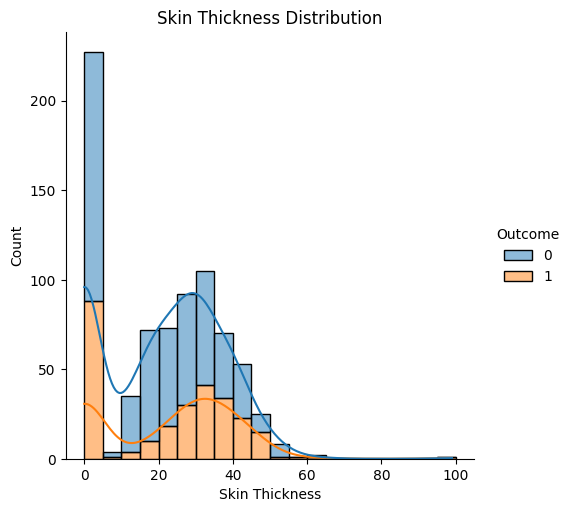

In [6]:
sns.displot(df, x='SkinThickness', binwidth=5, color = 'blue', kde=True, hue="Outcome", multiple="stack")
plt.xlabel('Skin Thickness')
plt.title('Skin Thickness Distribution')

print('Average Skin Thickness')
print('Total:', df['SkinThickness'].mean())
print('Patients without diabetes:', nodiabetes['SkinThickness'].mean())
print('Patients with diabetes:', yesdiabetes['SkinThickness'].mean(),'\n')

print('Median Skin Thickness')
print('Total:', df['SkinThickness'].median())
print('Patients without diabetes:', nodiabetes['SkinThickness'].median())
print('Patients with diabetes:', yesdiabetes['SkinThickness'].median())

Below is a distribution of serum insulin. The data was again split into those with diabetes (coloured as orange and an outcome of 1) and those without (coloured as blue and an outcome of 0). Both data have are heavily right skewed. 

Additionally, both the median and mean for serum insulin were printed for the entire dataset, those with diabetes, and those without diabetes. From this, we can see that on average, those with diabetes have a higher level of insulin. On the other hand, if we look at the median, those with diabetes have a much lower level of insulin.

To explain the results from looking at the average, the average contains data from outliers. Based on the median, it is obvious the outliers in insulin level are patients with very high levels of insulin. This can be explained by those who have insulin resistence. As the body becomes more resistent to insulin, the body may try to produce more to help decrease the blood glucose level. From the median, we can see that those with diabetes have an insulin level of 0. This can be explained by those with Type 1 diabetes or those with Type 2 who produce a lower amount of insulin. Again, since we do not know what type of diabetes the patients have, these conclusions are only extrapolated from the data. 

Average Insulin Level
Total: 79.79947916666667
Patients without diabetes: 68.792
Patients with diabetes: 100.33582089552239 

Median Insulin Level
Total: 30.5
Patients without diabetes: 39.0
Patients with diabetes: 0.0


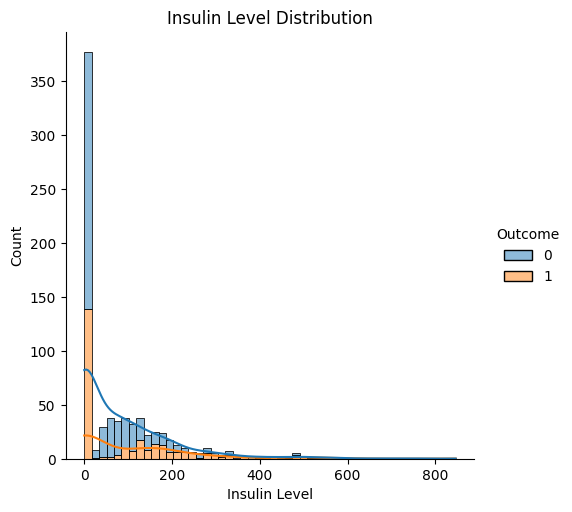

In [7]:
sns.displot(df, x='Insulin', bins=50, color = 'blue', kde=True, hue="Outcome", multiple="stack")
plt.xlabel('Insulin Level')
plt.title('Insulin Level Distribution')

print('Average Insulin Level')
print('Total:', df['Insulin'].mean())
print('Patients without diabetes:', nodiabetes['Insulin'].mean())
print('Patients with diabetes:', yesdiabetes['Insulin'].mean(),'\n')

print('Median Insulin Level')
print('Total:', df['Insulin'].median())
print('Patients without diabetes:', nodiabetes['Insulin'].median())
print('Patients with diabetes:', yesdiabetes['Insulin'].median())

Below is a distribution of patient BMI. The data was again split into those with diabetes (coloured as orange and an outcome of 1) and those without (coloured as blue and an outcome of 0). Both data have a relative normal distribution. 

Additionally, both the median and mean for the BMI were printed for the entire dataset, those with diabetes, and those without diabetes. While there is not a large difference in BMI, those with diabetes do have a larger BMI. 

This difference in BMI can be explained by the fact that those with a higher BMI can have a higher risk of diabetes. 

Average BMI
Total: 31.992578124999998
Patients without diabetes: 30.3042
Patients with diabetes: 35.14253731343284 

Median BMI
Total: 32.0
Patients without diabetes: 30.05
Patients with diabetes: 34.25


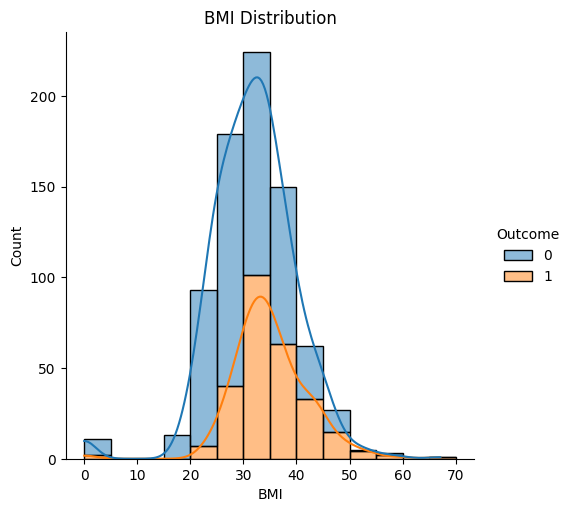

In [8]:
sns.displot(df, x='BMI', binwidth=5, color = 'blue', kde=True, hue="Outcome", multiple="stack")
plt.xlabel('BMI')
plt.title('BMI Distribution')

print('Average BMI')
print('Total:', df['BMI'].mean())
print('Patients without diabetes:', nodiabetes['BMI'].mean())
print('Patients with diabetes:', yesdiabetes['BMI'].mean(),'\n')

print('Median BMI')
print('Total:', df['BMI'].median())
print('Patients without diabetes:', nodiabetes['BMI'].median())
print('Patients with diabetes:', yesdiabetes['BMI'].median())

Below is a distribution of patient Diabetes Pedigree Function. The data was again split into those with diabetes (coloured as orange and an outcome of 1) and those without (coloured as blue and an outcome of 0). Both data have a right skew.

Additionally, both the median and mean for the Diabetes Pedigree Function were printed for the entire dataset, those with diabetes, and those without diabetes. Those with diabetes have a higher Diabetes Pedigree Function as show with both the mean and median. 

Diabetes Pedigree Function is the estimated likelihood of a patient to develope diabetes based on their age and family history. Therefore, it does make sense that those with diabetes have a higher Diabetes Pedigree Function. It is important to note that while diabetes is not specifically genetic, it is important to note that lifestyle choices are a contributer to diabetes. Those with a family history of diabetes may share lifestyle choices that contribute to the disease, such as diet or phyisical actvity level. 

Average Diabetes Pedigree Function
Total: 0.47187630208333325
Patients without diabetes: 0.42973400000000006
Patients with diabetes: 0.5505 

Median Diabetes Pedigree Function
Total: 0.3725
Patients without diabetes: 0.336
Patients with diabetes: 0.449


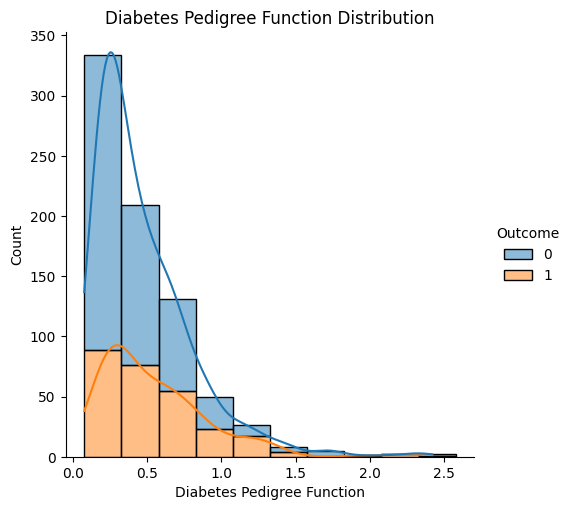

In [9]:
sns.displot(df, x='DiabetesPedigreeFunction', binwidth=0.25, color = 'blue', kde=True, hue="Outcome", multiple="stack")
plt.xlabel('Diabetes Pedigree Function')
plt.title('Diabetes Pedigree Function Distribution')

print('Average Diabetes Pedigree Function')
print('Total:', df['DiabetesPedigreeFunction'].mean())
print('Patients without diabetes:', nodiabetes['DiabetesPedigreeFunction'].mean())
print('Patients with diabetes:', yesdiabetes['DiabetesPedigreeFunction'].mean(),'\n')

print('Median Diabetes Pedigree Function')
print('Total:', df['DiabetesPedigreeFunction'].median())
print('Patients without diabetes:', nodiabetes['DiabetesPedigreeFunction'].median())
print('Patients with diabetes:', yesdiabetes['DiabetesPedigreeFunction'].median())

Below is a distribution of patient age. The data was again split into those with diabetes (coloured as orange and an outcome of 1) and those without (coloured as blue and an outcome of 0). Both data have a right skew.

Additionally, both the median and mean for age were printed for the entire dataset, those with diabetes, and those without diabetes. Those with diabetes were likely to be older than those without diabetes as show with both the mean and median. 

While diabetes is not age specific, its risk factor increases as person ages; this can explain the difference in average/median age between those with and without diabetes. 

Average Age
Total: 33.240885416666664
Patients without diabetes: 31.19
Patients with diabetes: 37.06716417910448 

Median Agen
Total: 29.0
Patients without diabetes: 27.0
Patients with diabetes: 36.0


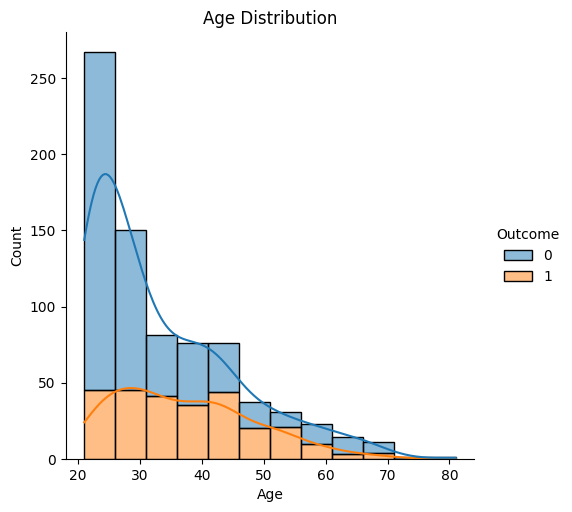

In [10]:
sns.displot(df, x='Age', binwidth=5, color = 'blue', kde=True, hue="Outcome", multiple="stack")
plt.xlabel('Age')
plt.title('Age Distribution')

print('Average Age')
print('Total:', df['Age'].mean())
print('Patients without diabetes:', nodiabetes['Age'].mean())
print('Patients with diabetes:', yesdiabetes['Age'].mean(),'\n')

print('Median Agen')
print('Total:', df['Age'].median())
print('Patients without diabetes:', nodiabetes['Age'].median())
print('Patients with diabetes:', yesdiabetes['Age'].median())

Below is a correlation matrix of the data. From this, we can see that the glucose level has the highest correlation with the diabetes status. BMI, age, pregnancy, Diabetes Pedigree Function, and insulin have somewhat positive correlations with diabetes. Blood pressure and skin thickness have little correlation with diabetes. 

Text(0.5, 1.0, 'Correlation Matrix')

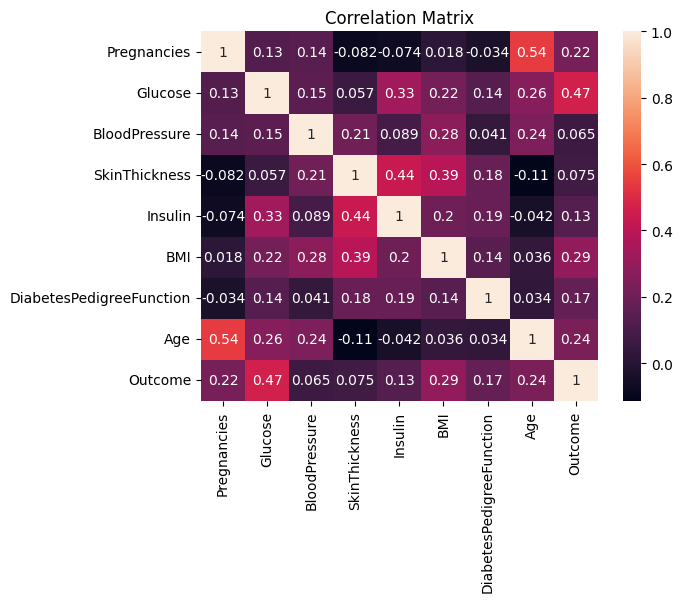

In [11]:
# Create correlation matrix
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')

## Diabetes Prediction

In this section, I attempt to predict the diabetes status of a patient based on all the health metrics. The data was split into 80% training and 20% testing data. For this, I decided to use simple classification algorithms, such as K-Nearest Neighbours, Random Forest Classifer, and Logistic Regression. Since patients with diabetes are likely to have similar health performance metrics, I believe these algorithms may have a high accuracy in classifying these patients. While more advanced algorithms, like a Neural Network, may be able to outperform more basic algorithms, I believe they are not necessary due to how simple the dataset is. 

In [12]:
# Split data into training data and labels
df_X = df.drop(columns=['Outcome'])
df_y = df[['Outcome']]

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=0)

In [13]:
# KNN Classification

num_neigh = [1] + list(range(5,105,2))
k_test_result = []
for k in num_neigh:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train.values.flatten())
    k_test_result.append(neigh.score(X_test, y_test.values.flatten()))
    
print('Best Number of Neighbours:', num_neigh[np.argmax(k_test_result)])
print('Best Accuracy:', k_test_result[np.argmax(k_test_result)]*100,'%')

Best Number of Neighbours: 19
Best Accuracy: 79.87012987012987 %


In [14]:
# Random Forest Classification

num_tree = [1] + list(range(5,205,5))
t_test_result = []
for k in num_neigh:
    rfc = RandomForestClassifier(n_estimators=k, random_state=0)
    rfc.fit(X_train, y_train.values.flatten())
    t_test_result.append(rfc.score(X_test, y_test.values.flatten()))
    
print('Best Number of Trees:', num_tree[np.argmax(t_test_result)])
print('Best Accuracy:', t_test_result[np.argmax(t_test_result)]*100,'%')

Best Number of Trees: 65
Best Accuracy: 79.87012987012987 %


In [15]:
# Logistic Regression

c = np.arange(0.05,2,0.05)
c_test_result = []
for k in c:
    lr = LogisticRegression(C=k, random_state=0,max_iter = 300)
    lr.fit(X_train, y_train.values.flatten())
    c_test_result.append(lr.score(X_test, y_test.values.flatten()))
    
print('Best C Value:', c[np.argmax(c_test_result)])
print('Best Accuracy:', c_test_result[np.argmax(c_test_result)]*100,'%')

Best C Value: 0.4
Best Accuracy: 82.46753246753246 %


From the above, the logistic regression algorithm was able to best classify the patients into their diabetes status with an accuracy of 82.5%. This result was followed closely by the Random Forest Classifer, 80.5%, and the K-Nearest Neighbour algorithm, 79.9%. These results show that the disease status of a patient could be predicted with the health metrics provided in the dataset with a high accuracy. 

While the dataset was fairly basic, it would be interesting if the accuracy could be improved with other health metrics. Additionally, it would be interesting to see if the diabetes type could be predicted either given all patients had diabetes or having a mix of patients with and without diabetes. 

Sources Used:
1. https://www.cdc.gov/diabetes/basics/diabetes.html
2. https://www.cdc.gov/diabetes/managing/problems.html
3. https://www.mayoclinic.org/diseases-conditions/type-1-diabetes/symptoms-causes/syc-20353011
4. https://www.mayoclinic.org/diseases-conditions/type-2-diabetes/symptoms-causes/syc-20351193
5. https://www.mayoclinic.org/diseases-conditions/gestational-diabetes/symptoms-causes/syc-20355339
6. https://www.nyp.org/diabetes-and-endocrinology/diabetes-resource-center/diabetes-and-hypertension
7. https://www.cdc.gov/diabetes/library/features/diabetes-and-your-skin.html
8. https://openventio.org/wp-content/uploads/Determinants-of-Gestational-Diabetes-Pedigree-Function-for-Pima-Indian-Females-IMOJ-6-121.pdf